<a href="https://colab.research.google.com/github/bhavika67/soft_computing/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm

A genetic algorithm (GA) is an optimization method inspired by natural selection and evolution. It solves complex problems by evolving a population of potential solutions through selection, crossover, and mutation.

Best solution found (binary): [1 1 1 1 1 1 1 1 1 1]
Best solution found (decimal): 1023
Best fitness value: 1046529


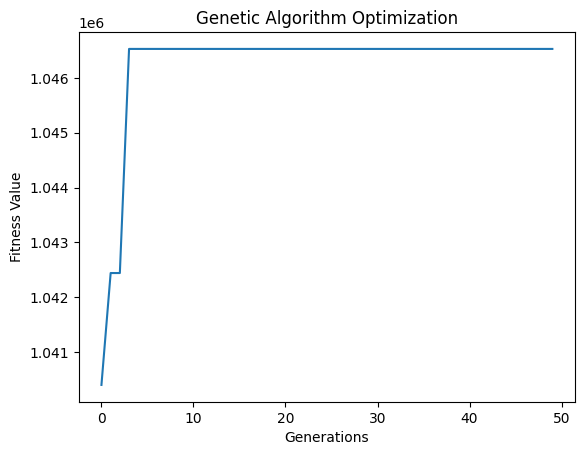

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem parameters
CHROMOSOME_LENGTH = 10  # Length of binary-encoded chromosome
POP_SIZE = 20           # Population size
GEN_MAX = 50            # Maximum number of generations
MUTATION_RATE = 0.01    # Mutation probability
TOURNAMENT_SIZE = 3     # Size for tournament selection

# Convert binary chromosome to decimal
def decode(chromosome):
    return int("".join(map(str, chromosome)), 2)

# Fitness function to maximize: f(x) = x^2
def fitness(chromosome):
    x = decode(chromosome)
    return x ** 2

# Initialize population with random binary strings
def initialize_population():
    return np.random.randint(2, size=(POP_SIZE, CHROMOSOME_LENGTH))

# Tournament selection
def select_parents(population, fitness_values):
    selected = []
    for _ in range(POP_SIZE):
        tournament = np.random.choice(range(POP_SIZE), TOURNAMENT_SIZE)
        selected.append(population[max(tournament, key=lambda idx: fitness_values[idx])])
    return np.array(selected)

# Crossover function - single point crossover
def crossover(parent1, parent2):
    if np.random.rand() < 0.9:  # Crossover probability
        point = np.random.randint(1, CHROMOSOME_LENGTH - 1)
        return np.concatenate((parent1[:point], parent2[point:]))
    else:
        return parent1

# Mutation function - bit flip mutation
def mutate(chromosome):
    for i in range(CHROMOSOME_LENGTH):
        if np.random.rand() < MUTATION_RATE:
            chromosome[i] = 1 - chromosome[i]  # Flip bit
    return chromosome

# Genetic Algorithm
def genetic_algorithm():
    population = initialize_population()
    best_fitness_values = []  # For tracking the best fitness over generations

    for generation in range(GEN_MAX):
        # Evaluate fitness
        fitness_values = np.array([fitness(ind) for ind in population])
        best_fitness_values.append(fitness_values.max())

        # Select parents
        parents = select_parents(population, fitness_values)

        # Generate new population through crossover and mutation
        new_population = []
        for i in range(0, POP_SIZE, 2):
            parent1, parent2 = parents[i], parents[i+1]
            offspring1 = crossover(parent1, parent2)
            offspring2 = crossover(parent2, parent1)
            new_population.append(mutate(offspring1))
            new_population.append(mutate(offspring2))
        population = np.array(new_population)

    # Final fitness evaluation
    final_fitness_values = [fitness(ind) for ind in population]
    best_solution = population[np.argmax(final_fitness_values)]

    return best_solution, best_fitness_values

# Run the algorithm and get the result
best_solution, best_fitness_values = genetic_algorithm()
print("Best solution found (binary):", best_solution)
print("Best solution found (decimal):", decode(best_solution))
print("Best fitness value:", fitness(best_solution))

# Plotting the fitness over generations
plt.plot(best_fitness_values)
plt.title("Genetic Algorithm Optimization")
plt.xlabel("Generations")
plt.ylabel("Fitness Value")
plt.show()
